In [1]:
from pathlib import Path
import os
import pandas as pd

import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score,v_measure_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

CACHE_DIR = Path(Path(os.getenv('APP_DIR')), '.cache')
NANOHUB_CACHE = Path(CACHE_DIR, 'nanohub')
NANOHUB_METRICS_CACHE = Path(CACHE_DIR, 'nanohub_metrics')


def create_silhouette_visual(sample, kmeans: KMeans, clusters: list = [2,3,4,5]):
    fig, ax = plt.subplots(2, 2, figsize=(15,8))
    for i in clusters:
        q, mod = divmod(i, 2)

        visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
        visualizer.fit(sample)
        
        
def display_cluster_info(X_scaled, clusters: [] = [2,3,4,5,6,7,8,9,10]):
    km_scores= []
    km_silhouette = []
    vmeasure_score =[]
    db_score = []
    
    fig, ax = plt.subplots(5, 2, figsize=(15,8))

    for i in clusters:
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X_scaled)
        preds = kmeans.predict(X_scaled)
        km_scores.append(-kmeans.score(X_scaled))
        print("Score for number of cluster(s) {}: {}".format(i,kmeans.score(X_scaled)))
        km_scores.append(-kmeans.score(X_scaled))

        silhouette = silhouette_score(X_scaled,preds)
        km_silhouette.append(silhouette)
        print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

        db = davies_bouldin_score(X_scaled,preds)
        db_score.append(db)
        print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))

        display("Centroids - ")
        print(kmeans.cluster_centers_)
        
        q, mod = divmod(i, 2)
    
        visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
        visualizer.fit(X_scaled)

        print("-"*100) 



In [2]:
df = pd.read_csv(
    Path(CACHE_DIR, 'unclassified_user_data.csv'),
    index_col=False,
    parse_dates=['last_start_date', 'first_start_date']
)

In [3]:
display(df)

,index,Unnamed: 0,user,first_start_date,last_start_date,first_finish_date,last_finish_date,job_count,superjob_count,job_event_days,superjob_event_days,last_superjob_start_date,toolevents__lifetime
0,6,6,0117tomboy,2019-09-26 22:12:11,2019-10-28 00:20:58,2019-09-26 22:43:17,2019-10-29 00:36:43,20,NaN,5,NaN,NaN,32
1,7,7,0190matze,2012-03-20 07:05:13,2012-06-21 02:49:03,2012-03-20 07:10:15,2012-06-21 14:07:48,20,NaN,3,NaN,NaN,93
2,19,19,061962588x,2021-04-28 01:54:30,2021-05-27 01:09:33,2021-04-28 03:31:52,2021-05-27 11:19:13,40,NaN,5,NaN,NaN,29
3,20,20,061972018x,2021-04-28 02:17:04,2021-05-27 01:13:31,2021-04-28 02:40:49,2021-05-28 01:20:45,66,NaN,4,NaN,NaN,29
4,26,26,0808wodlr,2020-11-10 00:04:08,2020-12-08 23:24:41,2020-11-11 00:12:54,2020-12-09 23:28:55,13,NaN,2,NaN,NaN,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36533,155284,155284,zzpnm003,2010-05-26 11:06:40,2010-09-08 00:21:42,2010-05-26 11:07:18,2010-09-08 00:21:42,11,NaN,2,NaN,NaN,104
36534,155296,155296,zzxhuang,2013-05-29 01:18:56,2016-01-18 22:31:47,2013-05-29 01:47:10,2016-01-20 04:03:50,21,NaN,3,NaN,NaN,966
36535,155297,155297,zzxtcwz,2018-02-01 12:05:31,2018-02-07 08:56:30,2018-02-01 12:34:29,2018-02-13 13:55:38,4,NaN,2,NaN,NaN,12
36536,155299,155299,zzyang19891221,2011-11-22 11:18:10,2013-09-23 22:33:59,2011-11-22 11:18:11,2013-09-23 22:33:59,82,NaN,13,NaN,NaN,671


In [4]:
users = pd.DataFrame(df['user'].unique())
users.columns = ['user']

In [5]:
monetary_df = df[['user', 'last_start_date', 'first_start_date']].copy()
monetary_df['Monetary'] = (monetary_df['last_start_date'] - monetary_df['first_start_date']).dt.days
monetary_df['job_lifetime'] = monetary_df['Monetary']

users = pd.merge(users, monetary_df, on='user')
display(users)

,user,last_start_date,first_start_date,Monetary,job_lifetime
0,0117tomboy,2019-10-28 00:20:58,2019-09-26 22:12:11,31,31
1,0190matze,2012-06-21 02:49:03,2012-03-20 07:05:13,92,92
2,061962588x,2021-05-27 01:09:33,2021-04-28 01:54:30,28,28
3,061972018x,2021-05-27 01:13:31,2021-04-28 02:17:04,28,28
4,0808wodlr,2020-12-08 23:24:41,2020-11-10 00:04:08,28,28
...,...,...,...,...,...
36533,zzpnm003,2010-09-08 00:21:42,2010-05-26 11:06:40,104,104
36534,zzxhuang,2016-01-18 22:31:47,2013-05-29 01:18:56,964,964
36535,zzxtcwz,2018-02-07 08:56:30,2018-02-01 12:05:31,5,5
36536,zzyang19891221,2013-09-23 22:33:59,2011-11-22 11:18:10,671,671


In [6]:

kmeans = KMeans(n_clusters=8)
kmeans.fit(users[['Monetary']])
users['MonetaryCluster'] = kmeans.predict(users[['Monetary']])

In [7]:
display(users.groupby('MonetaryCluster')['job_lifetime'].describe())

,count,mean,std,min,25%,50%,75%,max
MonetaryCluster,,,,,,,,
0,3371.0,698.303471,124.325347,505.0,588.00,693.0,801.00,935.0
1,1484.0,1739.745957,178.546309,1458.0,1586.00,1734.5,1886.25,2084.0
2,22117.0,38.152688,42.846898,0.0,6.00,20.0,57.00,174.0
3,605.0,3309.484298,280.190578,2871.0,3067.00,3293.0,3536.00,3877.0
4,2136.0,1174.645599,149.791138,936.0,1047.75,1157.0,1304.00,1457.0
5,1040.0,2426.699038,221.696523,2085.0,2226.75,2408.0,2612.00,2869.0
6,294.0,4451.823129,411.212163,3885.0,4092.50,4412.5,4672.50,5606.0
7,5491.0,312.056092,94.033493,175.0,228.00,302.0,388.00,504.0


In [8]:
users.to_csv(
    Path(CACHE_DIR, "monetary.csv"),
    index=False,
    index_label=False
)

In [9]:
scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(users[['Monetary']])

Score for number of cluster(s) 2: -192.21854290224528
Silhouette score for number of cluster(s) 2: 0.8067303574306284
Davies Bouldin score for number of cluster(s) 2: 0.45493360141355704


'Centroids - '

[[0.03460383]
 [0.39754545]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -88.24561809708673
Silhouette score for number of cluster(s) 3: 0.7661411873769897
Davies Bouldin score for number of cluster(s) 3: 0.4971898373510622


'Centroids - '

[[0.21324828]
 [0.54047728]
 [0.02068967]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -49.26348218113367
Silhouette score for number of cluster(s) 4: 0.7461673010386366
Davies Bouldin score for number of cluster(s) 4: 0.4869021860827352


'Centroids - '

[[0.01508928]
 [0.34662219]
 [0.14620711]
 [0.64567333]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 5: -31.591896427238492
Silhouette score for number of cluster(s) 5: 0.7292405416064578
Davies Bouldin score for number of cluster(s) 5: 0.4916137252407397


'Centroids - '

[[0.01146715]
 [0.43063006]
 [0.24590052]
 [0.69703231]
 [0.10684485]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 6: -22.2772302983249
Silhouette score for number of cluster(s) 6: 0.717162029923044
Davies Bouldin score for number of cluster(s) 6: 0.49715872978028103


'Centroids - '

[[0.00974592]
 [0.33103011]
 [0.74395384]
 [0.19310963]
 [0.08674895]
 [0.50518332]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 7: -16.138885608407115
Silhouette score for number of cluster(s) 7: 0.7095472010712621
Davies Bouldin score for number of cluster(s) 7: 0.48829943506349743


'Centroids - '

[[0.07219871]
 [0.40872561]
 [0.15973431]
 [0.7869805 ]
 [0.27220808]
 [0.00845873]
 [0.5758395 ]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 8: -12.23534332797873
Silhouette score for number of cluster(s) 8: 0.6977180911473931
Davies Bouldin score for number of cluster(s) 8: 0.49008261630688915


'Centroids - '

[[0.00712375]
 [0.43161731]
 [0.12681143]
 [0.79481011]
 [0.30924361]
 [0.05795067]
 [0.59003746]
 [0.21024661]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 9: -9.685931823173929
Silhouette score for number of cluster(s) 9: 0.6889086769731432
Davies Bouldin score for number of cluster(s) 9: 0.4914746642437327


'Centroids - '

[[0.00621998]
 [0.35252301]
 [0.61214304]
 [0.17228383]
 [0.048801  ]
 [0.80409483]
 [0.46815443]
 [0.25423474]
 [0.10545801]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 10: -7.841444410341902
Silhouette score for number of cluster(s) 10: 0.6805484072810161
Davies Bouldin score for number of cluster(s) 10: 0.49162563928344144


'Centroids - '

[[0.00562445]
 [0.49346069]
 [0.14640229]
 [0.82082218]
 [0.29407098]
 [0.08897642]
 [0.63552948]
 [0.04189727]
 [0.38471877]
 [0.21493666]]


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


----------------------------------------------------------------------------------------------------


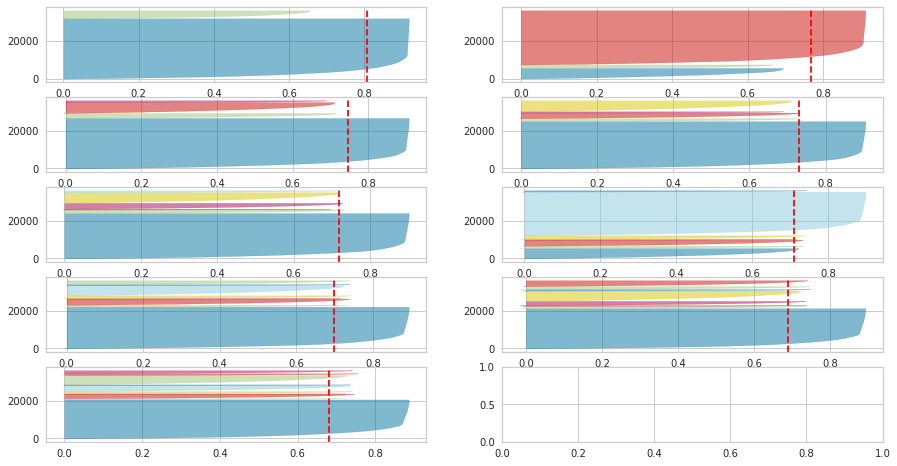

In [10]:
display_cluster_info(X_scaled)